# STEM-Related Job Listings in the Philippines 2021
## Introduction of the Dataset
### Choice of dataset type
### Potential Uses: 
It might be beneficial to future employees and workers in the Science, Technology, Engineering, and Mathematics (STEM) field for observing job trends in the current and past hiring companies

Methods of web-scraping can be referenced for those who are interested in creating their own version for other fields

### Sources Used: 
- https://www.workbank.com/
- https://pinoyjobs.ph/
- https://www.monster.com.ph
- https://ph.joblum.com/

### Research Questions:

### Motivation

## Imports used (to be described)

* `os` - a module that provides functions to interact with the operating system.
* `pandas` - is a tool that helps analyze data.
* `Seaborn` - A library in python that is used to better visualize data through drawing informative graphs.
* `math` - Imported library that allows quick computations of mathematical tasks
* `gensim.utils` `simple_preprocess` - used to preprocess text by making them lower-cased, and transforming the words to their original form (de-tokenizing)
* `gensim.parsing.preprocessing` `STOPWORDS` - stop words common words that do not have value and are often removed in pre-processing
* `gensim` `corpora` - used to work with corpus and words
* `gensim` `models` - used for topic modelling and model training
* `nltk.stem` `WordNetLemmatizer` - used for grouping similar strings together
* `bs4` `BeautifulSoup` - library used to web scrape HTML from websites
* `datetime` `datetime` - An imported module in python to create an object that properly resembles date and time. Used for converting string of time into datetime format to month, day, and year.
* `datetime` `timedelta` - used for finding delta of time ago with time scraped if date has minutes, hours, days, or weeks ago
* `dateutil.relativedelta` `relativedelta` - used for finding delta of time ago with time scraped if date has months and years

In [7]:
import os
import pandas as pd
import seaborn as sns

# EDA

### Uniform Formatting of Salary

In [8]:
#EDA DATA CLEANING
def remove_comma(salary):
    try:
        return salary.replace(",","")
    except:
        return salary

### Normalizing Salary
Some salaries have their amounts in annual payment format than monthly payment. To account for that, the following function checks for the salary if it is a very high amount, and if it is then it must be an annual salary and removes it from the daraset.

In [9]:
def anual_salary_remover(salary):
    try:
        if salary > 91000:
            return None
        else:
            return salary
    except:
        return salary

### Experience Outlier Remover
Some years of experience are too high and are considered outliers. We then remove such instances by checking if the years are more than 15 years.

In [10]:
def experience_outlier_remover(years):
    try:
        if years > 15:
            return None
        else:
            return years
    except:
        return years    

In [11]:
#new_date_posted = []
#for index, row in JOBLUM_df.iterrows():
#    print("date_string =", row["Date Posted"])
#    print("type of date_string =", type(row["Date Posted"]))
#JOBLUM_df["Date Posted"] = new_date_posted

### Reading all CSV Files and concatenating everything

In [12]:
WORKBANK_COMPILED_DF = pd.read_csv(r'Cleaned Data CSV\Workbank_Clean.csv')
PINOYJOBS_COMPILED_DF = pd.read_csv(r'Cleaned Data CSV\PinoyJobs_Clean.csv')
MONSTERPH_COMPILED_DF = pd.read_csv(r'Cleaned Data CSV\Joblum_Clean.csv')
JOBLUM_COMPILED_DF = pd.read_csv(r'Cleaned Data CSV\Joblum_Clean.csv')

### Formatting Joblum

In [13]:
JOBLUM_COMPILED_DF["Min Salary"] = JOBLUM_COMPILED_DF["Min Salary"].apply(remove_comma)
JOBLUM_COMPILED_DF["Max Salary"] = JOBLUM_COMPILED_DF["Max Salary"].apply(remove_comma)
JOBLUM_COMPILED_DF["Min Salary"] = pd.to_numeric(JOBLUM_COMPILED_DF["Min Salary"], errors='coerce')
JOBLUM_COMPILED_DF["Max Salary"] = pd.to_numeric(JOBLUM_COMPILED_DF["Max Salary"], errors='coerce')

### Formatting WorkBank

In [14]:
WORKBANK_COMPILED_DF["Min Salary"] = pd.to_numeric(WORKBANK_COMPILED_DF["Min Salary"], errors='coerce')
WORKBANK_COMPILED_DF["Max Salary"] = pd.to_numeric(WORKBANK_COMPILED_DF["Max Salary"], errors='coerce')
WORKBANK_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(WORKBANK_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
WORKBANK_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(WORKBANK_COMPILED_DF["Max Years of Work Experience"], errors='coerce')

### Formatting PinoyJobs

In [15]:
PINOYJOBS_COMPILED_DF["Min Salary"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Min Salary"], errors='coerce')
PINOYJOBS_COMPILED_DF["Max Salary"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Max Salary"], errors='coerce')
PINOYJOBS_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
PINOYJOBS_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Max Years of Work Experience"], errors='coerce')

### Formatting Monster PH

In [16]:
MONSTERPH_COMPILED_DF["Min Salary"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Min Salary"], errors='coerce')
MONSTERPH_COMPILED_DF["Max Salary"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Max Salary"], errors='coerce')
MONSTERPH_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
MONSTERPH_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Max Years of Work Experience"], errors='coerce')

### Compilation into One DataFrame

In [17]:
JOBS_COMPILED_DF = pd.concat([WORKBANK_COMPILED_DF, PINOYJOBS_COMPILED_DF, MONSTERPH_COMPILED_DF, JOBLUM_COMPILED_DF], join="inner", ignore_index=True, sort=False)

### Applying Functions

In [18]:
JOBS_COMPILED_DF["Date Posted"] = pd.to_datetime(JOBS_COMPILED_DF["Date Posted"], errors='coerce')
JOBS_COMPILED_DF["Min Salary"] = JOBS_COMPILED_DF["Min Salary"].apply(anual_salary_remover)
JOBS_COMPILED_DF["Max Salary"] = JOBS_COMPILED_DF["Max Salary"].apply(anual_salary_remover)
JOBS_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(JOBS_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
JOBS_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(JOBS_COMPILED_DF["Max Years of Work Experience"], errors='coerce')
JOBS_COMPILED_DF["Min Years of Work Experience"] = JOBS_COMPILED_DF["Min Years of Work Experience"].apply(experience_outlier_remover)
JOBS_COMPILED_DF["Max Years of Work Experience"] = JOBS_COMPILED_DF["Max Years of Work Experience"].apply(experience_outlier_remover)

### Display DataFrame

In [19]:
JOBS_COMPILED_DF

,Website,Job Title,Category,Company,Date Posted,Location,Status,Education,Job Description,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience,Field
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Full Time,Bachelor’s Degree,The ideal candidate will perform day to day su...,NaN,NaN,3.0,5.0,IT
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Contract Base,Bachelor’s Degree,- Analyze and understand requirements provided...,80000.0,90000.0,3.0,5.0,IT
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,Bachelor’s Degree,Participate in all Scrum ceremonies (Sprint P...,40000.0,70000.0,1.0,3.0,IT
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,Bachelor’s Degree,Self-organizing and cross functional developme...,40000.0,75000.0,3.0,5.0,IT
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,2021-05-22,Taguig,Full Time,Bachelor’s Degree,"In this position, you will work closely with o...",80000.0,NaN,3.0,5.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35631,Joblum,Statistician Aide (010-0465),Actuarial/Statistics,Provincial Government of Albay - Government,2021-05-01,Bicol Region,Not Specified,Not Specified,"Deadline for accepting applications : May 7, 2...",14400.0,14400.0,NaN,NaN,Mathematics
35632,Joblum,ELECTION ASSISTANT II,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,Bachelor's Degree,"Deadline for accepting applications : May 15, ...",19593.0,19593.0,NaN,NaN,Mathematics
35633,Joblum,ELECTION ASSISTANT I,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,Bachelor's Degree,"Deadline for accepting applications : May 15, ...",17179.0,17179.0,NaN,NaN,Mathematics
35634,Joblum,Reporting Analyst,Actuarial/Statistics,Alta Resources (Philippines) Corporation,2021-04-29,National Capital Reg,Contract,Bachelor's Degree,The Reporting Analyst will be responsible for ...,NaN,NaN,NaN,NaN,Mathematics


# Saving Compiled Data to CSV

In [20]:
JOBS_COMPILED_DF.to_csv('Cleaned Data CSV/jobs_listing.csv')

### Data Types of Features

In [14]:
JOBS_COMPILED_DF.dtypes

Website                                 object
Job Title                               object
Category                                object
Company                                 object
Date Posted                     datetime64[ns]
Location                                object
Status                                  object
Education                               object
Job Description                         object
Min Salary                             float64
Max Salary                             float64
Min Years of Work Experience           float64
Max Years of Work Experience           float64
Field                                   object
dtype: object

Distribution among the different Fields in the WorkBank website.

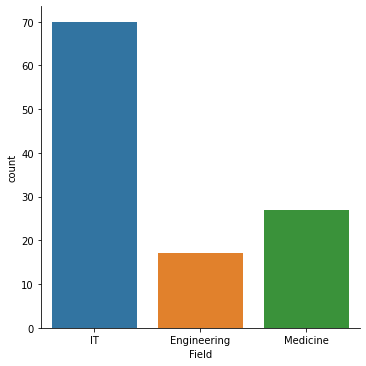

In [15]:
Workbank_Fields = sns.catplot(x="Field", kind="count", data=WORKBANK_COMPILED_DF)

Distribution among the different Fields in the Monster website.

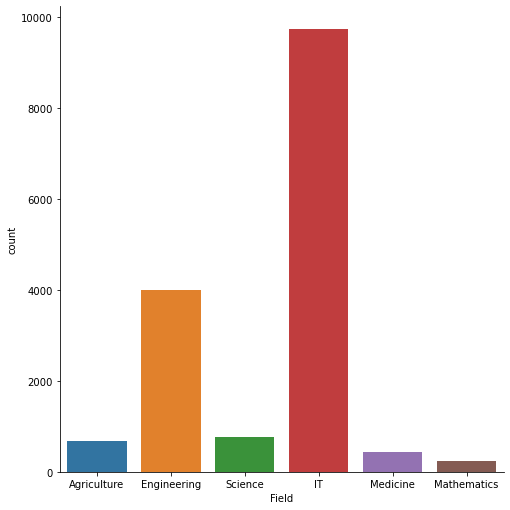

In [16]:
Monster_Fields = sns.catplot(x="Field", kind="count", height=7, data=MONSTERPH_COMPILED_DF)

Distribution among the different Fields in the PinoyJobs website.

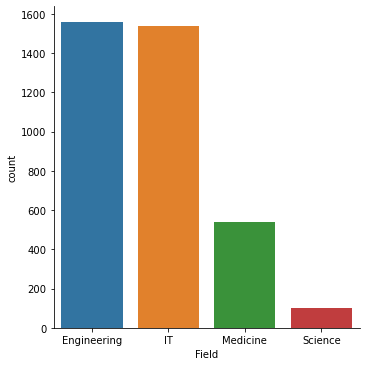

In [17]:
PinoyJobs_Fields = sns.catplot(x="Field", kind="count", data=PINOYJOBS_COMPILED_DF)

Distribution among the different Fields in the JobLum website.

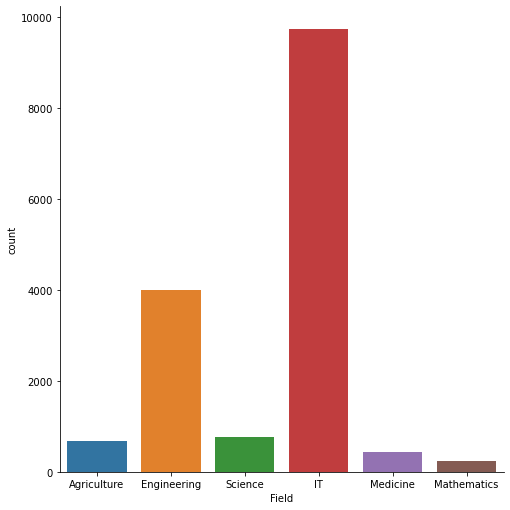

In [18]:
Joblum_Field = sns.catplot(x="Field", kind="count", height=7, data=JOBLUM_COMPILED_DF)

Distribution of the Fields in all of the websites altogether.

<AxesSubplot:ylabel='counts'>

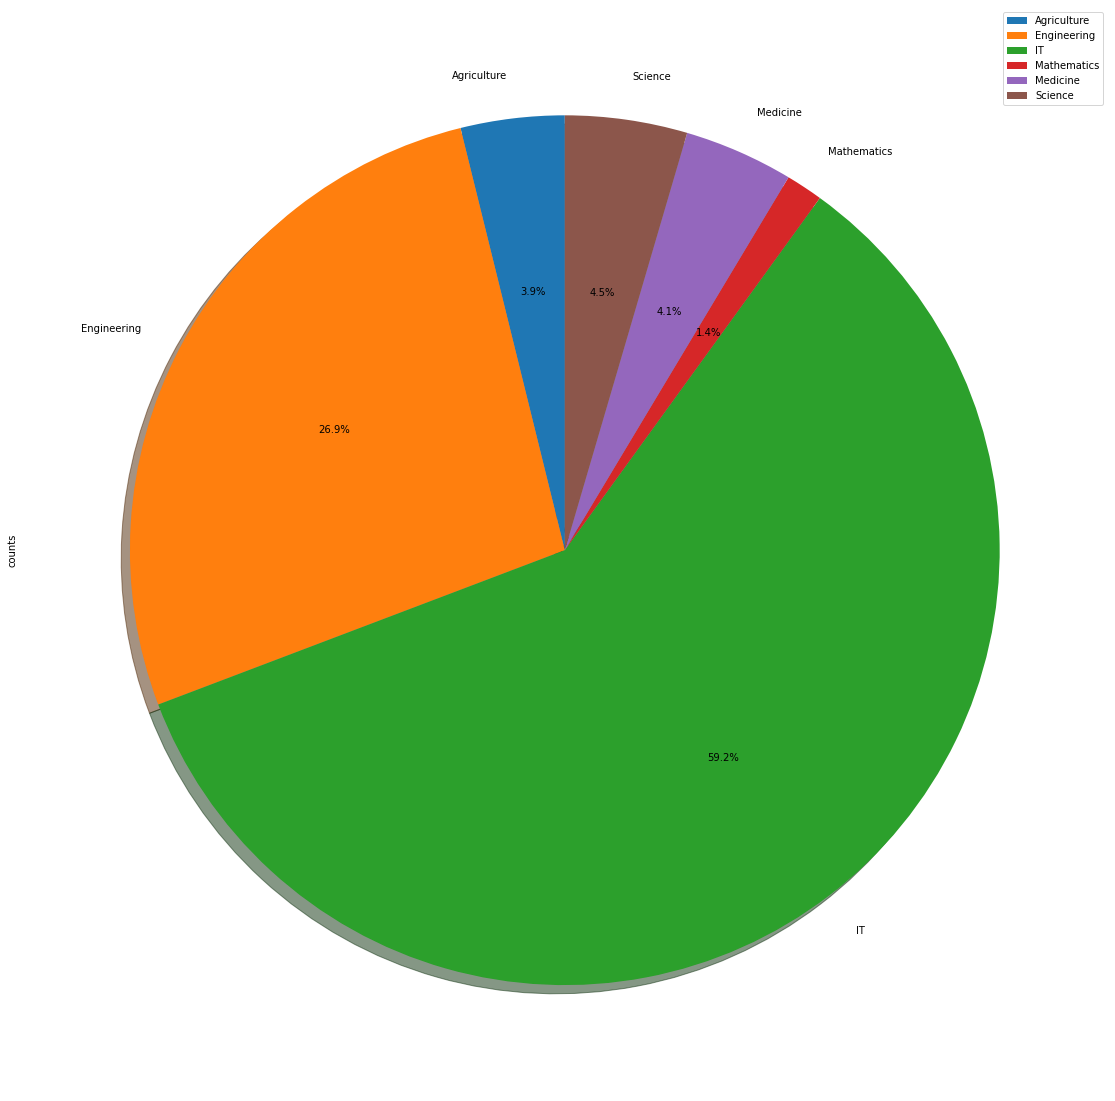

In [19]:
#Create PieChart JOBS_COMPILED_DF
JOBS_GB_Field = JOBS_COMPILED_DF.groupby(["Field"]).size().reset_index(name='counts')
JOBS_GB_Field.plot.pie(y='counts', figsize=(20, 20),autopct='%1.1f%%',labels=JOBS_GB_Field["Field"],
        shadow=True, startangle=90)

Pie chart showing the distribution of job listings among the four websites.

<AxesSubplot:ylabel='counts'>

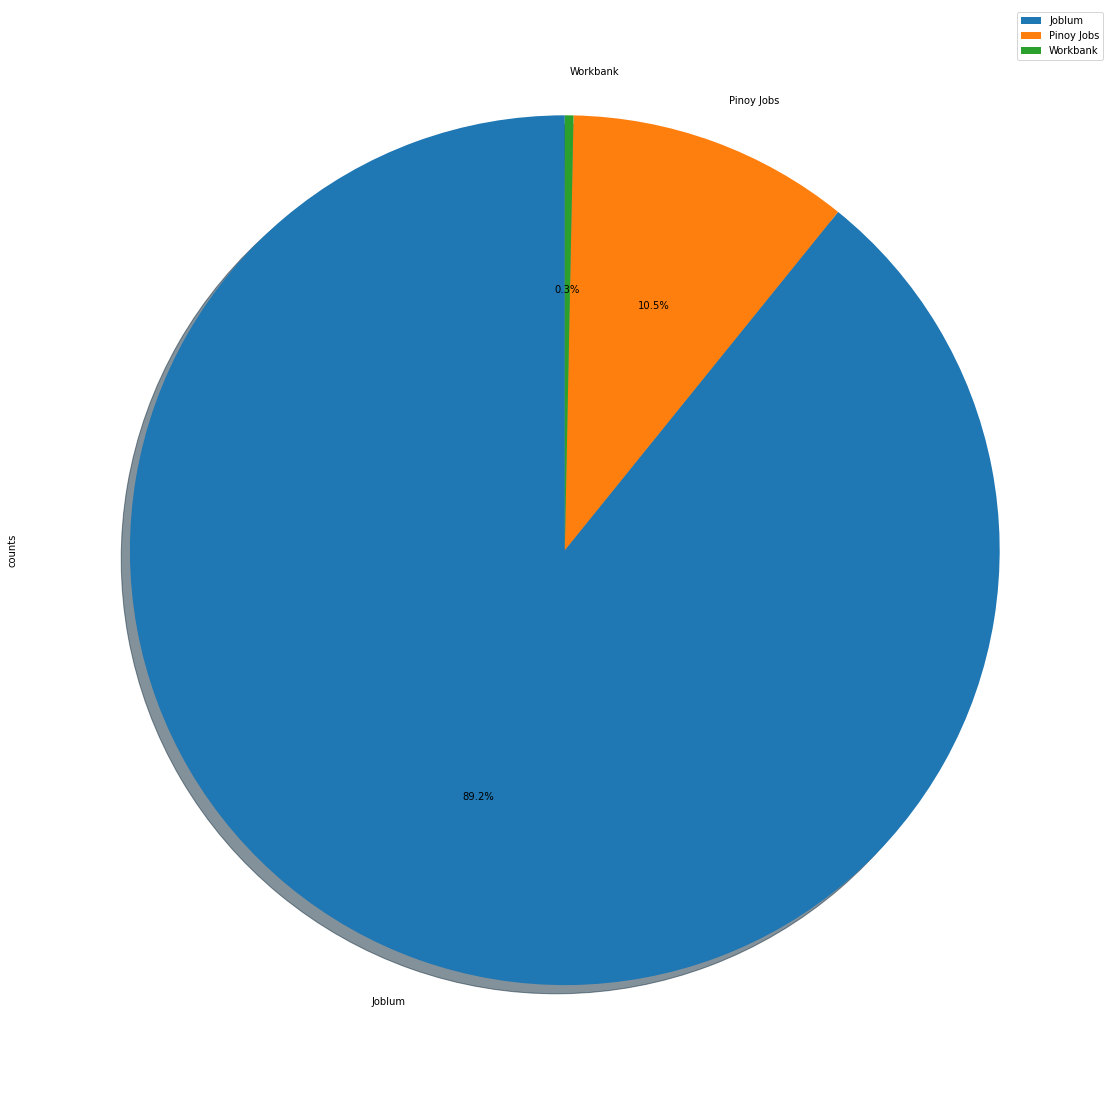

In [20]:
#Create PieChart JOBS_COMPILED_DF
JOBS_GB_WEBSITE = JOBS_COMPILED_DF.groupby(["Website"]).size().reset_index(name='counts')
JOBS_GB_WEBSITE.plot.pie(y='counts', figsize=(20, 20),autopct='%1.1f%%',labels=JOBS_GB_WEBSITE["Website"],
        shadow=True, startangle=90)

Minimum salary and Fields plot. The Field with the highest Min Salary is found out to be IT. While the lowest Min Salary is the Medicine field.

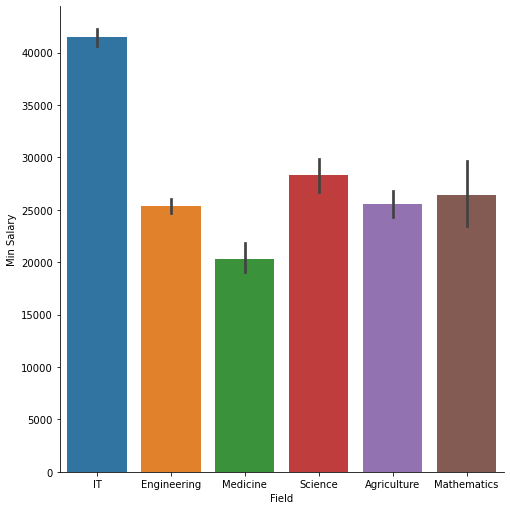

In [21]:
JOBS_COMPILED_DF_MinS_plot = sns.catplot(x="Field", y="Min Salary", kind="bar", height=7,data=JOBS_COMPILED_DF)

Maximum salary and Fields plot. Lke with the Min Salary, it seems that the Field with the highest Max Salary is found out to be IT. While the lowest Max Salary is the Medicine field.

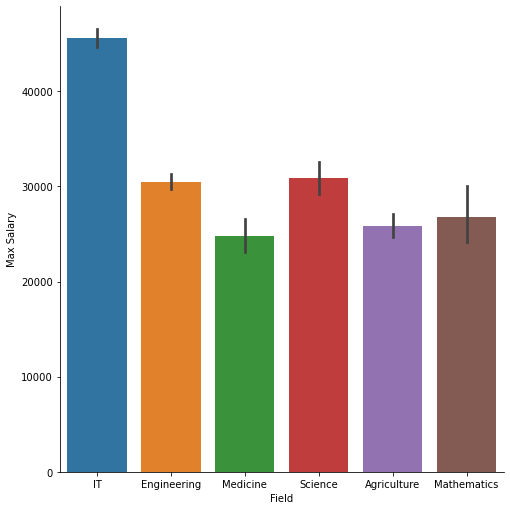

In [22]:
JOBS_COMPILED_DF_MinS_plot = sns.catplot(x="Field", y="Max Salary", kind="bar", height=7,data=JOBS_COMPILED_DF)

Minimum Years of Work Experience and Fields plot.

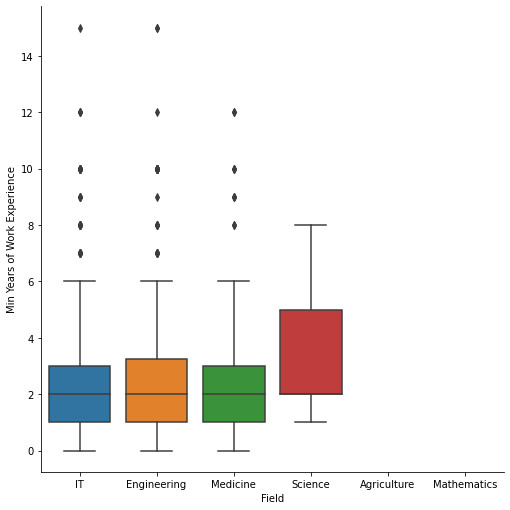

In [23]:
JOBS_COMPILED_DF_MinY_plot = sns.catplot(x = "Field",y="Min Years of Work Experience", height=7, kind="box",data=JOBS_COMPILED_DF)

Maximum Years of Work Experience and Fields plot.

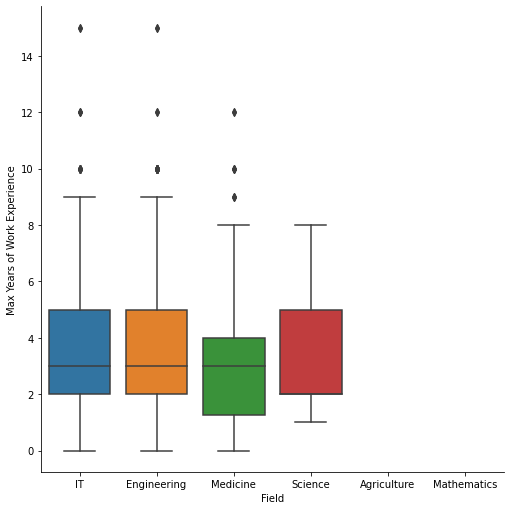

In [24]:
JOBS_COMPILED_DF_MinY_plot = sns.catplot(x = "Field",y="Max Years of Work Experience", height=7, kind="box",data=JOBS_COMPILED_DF)